# Creating Floor Walking tripod gait from single step


In [1174]:
"""
#installing flygym to use juypternotebook
import os
os.chdir('..')
import sys
path = '/Users/laeti/Documents/EPFL/BA6Projet/flygym_adhesion-Laetitia'# replace 'my_folder' with the name of your folder
os.chdir(path)
sys.path.append(path)
"""

"\n#installing flygym to use juypternotebook\nimport os\nos.chdir('..')\nimport sys\npath = '/Users/laeti/Documents/EPFL/BA6Projet/flygym_adhesion-Laetitia'# replace 'my_folder' with the name of your folder\nos.chdir(path)\nsys.path.append(path)\n"

In [1175]:
#pip install -e ."[mujoco]

In [1176]:
import numpy as np
import pkg_resources
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo
from tqdm import trange
from flygym.util.config import all_leg_dofs
import os 

In [1177]:


# Initialize simulation

#out_dir = Path('../CPGs')

friction = 1.0

physics_config = {
    'joint_stiffness': 2500,
    'friction': (friction, 0.005, 0.0001),
    'gravity': (0, 0, -9.81e5)}
terrain_config = {'fly_pos': (0, 0, 300),
                  'friction': (friction, 0.005, 0.0001)}

nmf = NeuroMechFlyMuJoCo(render_mode='saved',
                         timestep=1e-4,
                         render_config={'playspeed': 0.1, 'camera': 'Animat/camera_left'},
                         init_pose='stretch',
                         actuated_joints=all_leg_dofs)





[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="2500"/>] actuators _adhesion
[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion na

In [1178]:
# Load recorded data
data_path = Path(pkg_resources.resource_filename('flygym', 'data'))
with open(data_path / 'behavior' / 'single_steps.pkl', 'rb') as f:
    data = pickle.load(f)

In [1179]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])
print(1278*0.0001) # 0.1278 seconds! 

Dict keys: dict_keys(['meta', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 1278
Metadata: {'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}
0.1278


In [1180]:
legs = [f'{side}{pos}'
for side in 'LR'
for pos in 'FMH']


if 'joint_LF' in 'joint_LFCoxa':
    print('yes')

yes


In [1181]:
# Assuming 'data' is the dictionary containing the step data
nr_steps = 10  # Number of cycles to repeat

# Define the leg pairs
leg_pairs1 = ['LF', 'LH', 'RM']
leg_pairs2 = ['LM', 'RF', 'RH']

# Loop over the legs and shift the data for the legs in leg pairs 1 to create tripod gaits

for leg in legs:
    if leg in leg_pairs1:
        joint_keys = [key for key in data.keys() if key.startswith(f'joint_{leg}')]
        print(1)
        print(joint_keys)

        for key in joint_keys:
            data_leg_pairs1 = np.tile(data[key], nr_steps)  # Repeat the data 6 times
            data_leg_pairs1_shifted = np.roll(data_leg_pairs1, int(len(data[key]) / 2))  # Shift the data by half its length
            data[key] = data_leg_pairs1_shifted
    else: 
        joint_keys = [key for key in data.keys() if key.startswith(f'joint_{leg}')]
        print(2)
        print(joint_keys)

        for key in joint_keys:
            #dont shift the data for leg pairs 2
            data_leg_pairs2 = np.tile(data[key], nr_steps)  # Repeat the data 6 times
            data[key] = data_leg_pairs2


1
['joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1']
2
['joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1']
1
['joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1']
2
['joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1']
1
['joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1']
2
['joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1']


In [1182]:
nmf.actuated_joints

['joint_LFCoxa',
 'joint_LFCoxa_roll',
 'joint_LFCoxa_yaw',
 'joint_LFFemur',
 'joint_LFFemur_roll',
 'joint_LFTibia',
 'joint_LFTarsus1',
 'joint_LMCoxa',
 'joint_LMCoxa_roll',
 'joint_LMCoxa_yaw',
 'joint_LMFemur',
 'joint_LMFemur_roll',
 'joint_LMTibia',
 'joint_LMTarsus1',
 'joint_LHCoxa',
 'joint_LHCoxa_roll',
 'joint_LHCoxa_yaw',
 'joint_LHFemur',
 'joint_LHFemur_roll',
 'joint_LHTibia',
 'joint_LHTarsus1',
 'joint_RFCoxa',
 'joint_RFCoxa_roll',
 'joint_RFCoxa_yaw',
 'joint_RFFemur',
 'joint_RFFemur_roll',
 'joint_RFTibia',
 'joint_RFTarsus1',
 'joint_RMCoxa',
 'joint_RMCoxa_roll',
 'joint_RMCoxa_yaw',
 'joint_RMFemur',
 'joint_RMFemur_roll',
 'joint_RMTibia',
 'joint_RMTarsus1',
 'joint_RHCoxa',
 'joint_RHCoxa_roll',
 'joint_RHCoxa_yaw',
 'joint_RHFemur',
 'joint_RHFemur_roll',
 'joint_RHTibia',
 'joint_RHTarsus1']

In [1183]:
def amplify_angle_mvmt(joint_name, data, factor):
    """
    Amplify the angle of a joint by a factor by keeping the mean angle constant: x(t) = x_mean + factor * (x(t) - x_mean)

    joint_name: string
    data: dictionary
    factor: float

    """
    mean_angle = np.mean(data[joint_name])
    data[joint_name] = mean_angle + factor * (np.array(data[joint_name]) - mean_angle)
    return data

#for testing the function
data_test = {"join_abc": [1.,2.,3.,4.,5.,6.,3.,2.,1.,0,1.,2.,3.,4.,5.,6.,3.,2.,1.,0]}
amplify_angle_mvmt("join_abc", data_test, 2)
print(data_test)


{'join_abc': array([-0.7,  1.3,  3.3,  5.3,  7.3,  9.3,  3.3,  1.3, -0.7, -2.7, -0.7,
        1.3,  3.3,  5.3,  7.3,  9.3,  3.3,  1.3, -0.7, -2.7])}


In [1184]:
#angles i want to modify; reference side L
def autocorrect_angles(data):
    for side in 'LR':
        print(side)
        print(data[f"joint_{side}MCoxa"])
        data[f"joint_{side}MCoxa"] += np.deg2rad(45) # Protract the midlegs
        #data[f"joint_{side}MFemur"] -= np.deg2rad(10) #added Protract the midlegs (slightly to conterbalance Tarsus flexion)
        #data[f"joint_{side}MTarsus1"] -= np.deg2rad(5) #added # Tarsus more parallel to the ground (flexed) (also helps with the hindleg retraction)
        #data[f"joint_{side}MTibia"] += np.deg2rad(15) #added 
        data[f"joint_{side}HFemur"] += np.deg2rad(-5) # Retract the hindlegs
        data[f"joint_{side}HFemur"] += np.deg2rad(-5) # Retract the hindlegs
        data[f"joint_{side}HTarsus1"] -= np.deg2rad(15) # Tarsus more parallel to the ground (flexed) (also helps with the hindleg retraction)
        data[f"joint_{side}FFemur"] += np.deg2rad(15) # Protract the forelegs (slightly to conterbalance Tarsus flexion)
        data[f"joint_{side}FTarsus1"] -= np.deg2rad(15) # Tarsus more parallel to the ground (flexed) (also helps with the hindleg retraction)
    data[f"joint_LMCoxa_yaw"] += np.deg2rad(20) #added
    data[f"joint_LMCoxa_roll"] += np.deg2rad(10) # the midlegs
    data[f"joint_LMFemur_roll"] -= np.deg2rad(15) #added
    data[f"joint_RMCoxa_yaw"] -= np.deg2rad(20) #added
    data[f"joint_RMCoxa_roll"] -= np.deg2rad(10) # the midlegs
    data[f"joint_RMFemur_roll"] += np.deg2rad(15) #added
    return data
data = autocorrect_angles(data)



L
[0.00213375 0.0021375  0.00214126 ... 0.02194152 0.01203763 0.00213375]
R
[-0.0594652  -0.05947456 -0.05948392 ... -0.05941494 -0.05943539
 -0.05945584]


In [1185]:

#for amplifying the data of certain joints. List of joints to amplify: Tarsus1 only LM, RM, LH, RH, For the middle legs i want to amplify all joints contained in actuated_joints

#amplify the data of the joints in actuated_joints
for side in ["L", "R"]:     
    for joint in nmf.actuated_joints:
        if joint.startswith(f"joint_{side}F"):
            data = amplify_angle_mvmt(joint, data, 0.75)
        #modify all middle leg joints
        if joint.startswith(f"joint_{side}M"):
            data = amplify_angle_mvmt(joint, data, 1.5)
        #if joint == f"joint_{side}MFemur_roll":
        #    data = amplify_angle_mvmt(joint, data, 0.5)
        if joint == f"joint_{side}HTarsus1":
            data = amplify_angle_mvmt(joint, data, 1.5)


In [1186]:
#data[f"joint_LMFemur_roll"] -= np.deg2rad(10) #  rotate femur so that the legs are more torwards the back


In [1187]:
# Interpolate 5x
step_duration = len(data['joint_LFCoxa'])
interp_step_duration = int(step_duration * data['meta']['timestep'] / nmf.timestep)
step_data_block_base = np.zeros((len(nmf.actuated_joints), interp_step_duration))
measure_t = np.arange(step_duration) * data['meta']['timestep']
interp_t = np.arange(interp_step_duration) * nmf.timestep
for i, joint in enumerate(nmf.actuated_joints):
    step_data_block_base[i, :] = np.interp(interp_t, measure_t, data[joint])

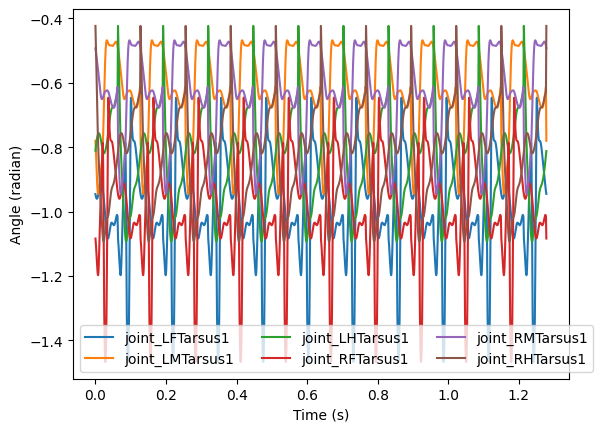

In [1188]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[6:num_joints_to_visualize:7].T,
         label=nmf.actuated_joints[6:num_joints_to_visualize:7])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

In [1189]:
data['meta']

{'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}

In [1190]:
print('Dict keys:', data.keys())
print('Length of time series:', len(data['joint_RFCoxa']))
print('Metadata:', data['meta'])
print(34506*0.0001) # 0.1278 seconds! 

Dict keys: dict_keys(['meta', 'joint_LFCoxa', 'joint_LFCoxa_roll', 'joint_LFCoxa_yaw', 'joint_LFFemur', 'joint_LFFemur_roll', 'joint_LFTibia', 'joint_LFTarsus1', 'joint_LMCoxa', 'joint_LMCoxa_roll', 'joint_LMCoxa_yaw', 'joint_LMFemur', 'joint_LMFemur_roll', 'joint_LMTibia', 'joint_LMTarsus1', 'joint_LHCoxa', 'joint_LHCoxa_roll', 'joint_LHCoxa_yaw', 'joint_LHFemur', 'joint_LHFemur_roll', 'joint_LHTibia', 'joint_LHTarsus1', 'joint_RFCoxa', 'joint_RFCoxa_roll', 'joint_RFCoxa_yaw', 'joint_RFFemur', 'joint_RFFemur_roll', 'joint_RFTibia', 'joint_RFTarsus1', 'joint_RMCoxa', 'joint_RMCoxa_roll', 'joint_RMCoxa_yaw', 'joint_RMFemur', 'joint_RMFemur_roll', 'joint_RMTibia', 'joint_RMTarsus1', 'joint_RHCoxa', 'joint_RHCoxa_roll', 'joint_RHCoxa_yaw', 'joint_RHFemur', 'joint_RHFemur_roll', 'joint_RHTibia', 'joint_RHTarsus1'])
Length of time series: 12780
Metadata: {'timestep': 0.0001, 'source': 'Analyze_step_data.ipynb'}
3.4506


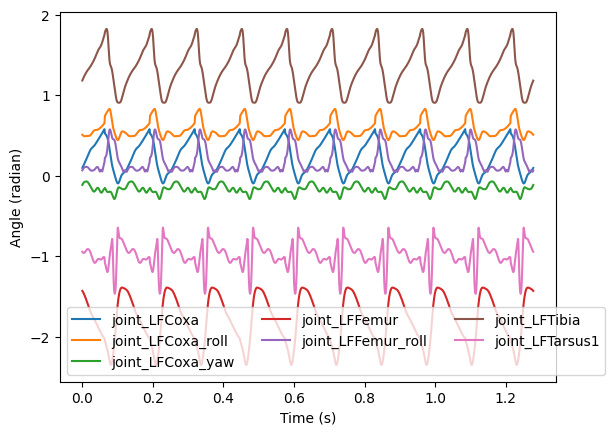

In [1191]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[:num_joints_to_visualize-35].T,
         label=nmf.actuated_joints[:num_joints_to_visualize-35])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

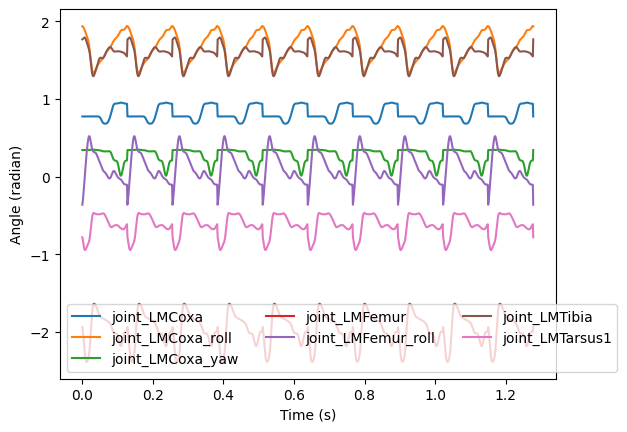

In [1192]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[7:num_joints_to_visualize-28].T,
         label=nmf.actuated_joints[7:num_joints_to_visualize-28])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

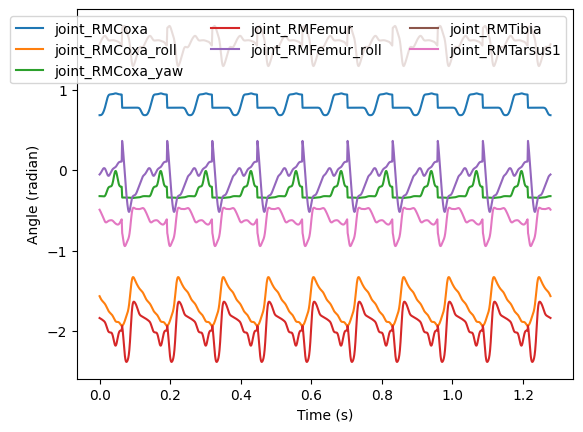

In [1193]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[28:num_joints_to_visualize-7].T,
         label=nmf.actuated_joints[28:num_joints_to_visualize-7])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

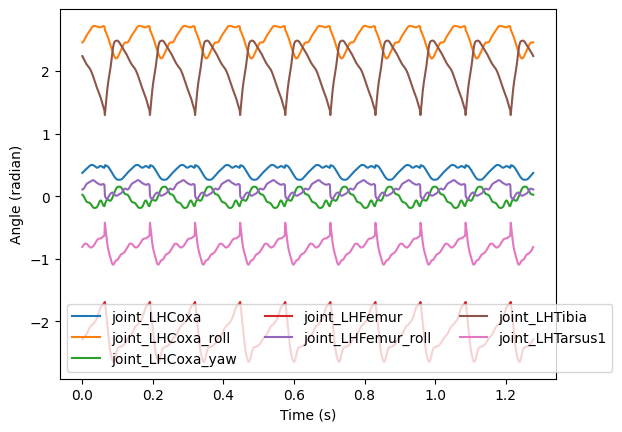

In [1194]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[14:num_joints_to_visualize-21].T,
         label=nmf.actuated_joints[14:num_joints_to_visualize-21])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

In [1195]:
step_data_block_base.shape[1]*0.0001

1.278

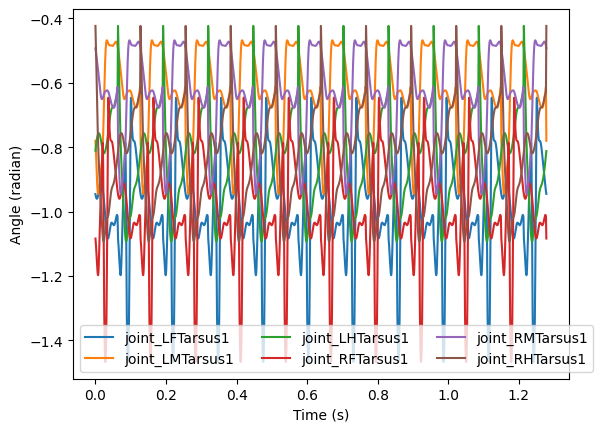

In [1196]:
num_joints_to_visualize = 42
plt.plot(np.arange(step_data_block_base.shape[1]) * nmf.timestep,
         step_data_block_base[6:num_joints_to_visualize:7].T,
         label=nmf.actuated_joints[6:num_joints_to_visualize:7])
plt.legend(ncol = 3)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radian)')
plt.show()

In [1197]:
step_data_block_base.shape[1]*0.0001

1.278

In [1198]:
import pickle

# Specify the file path for the pickle file
file_path = 'fly_floorwaking_15cycles_tripod.pkl'

# Open the file in write mode
with open(file_path, 'wb') as file:
    # Serialize and write the data to the file
    pickle.dump(data, file)

In [1199]:
# The simulation will be run twice, once with the adhesion: np.zeros(6) and once with np.ones(6) and np.zeros(6) alternating during varying times. 
# The adhesion is applied to the tarsus 5 of each leg.
# We want to plot the forces applied to the tarsus 5 of each leg. on the same plot but with 6 subplots, one for each leg. The first run is on the primary axis, the second run on the secondary axis. 
# The forces are plotted in the order of the legs: LFTarsus5, LHTarsus5, RMTarsus5, RFTarsus5, RHTarsus5, LMTarsus5
# The final video will be recorded. 


def run_simulation_dynamic(data_block, num_steps_base, n_stabilisation_steps, adhesion_feature = None):
    #adhesion_feature: Array denoting whether adhesion is on or off at each timestep.

    adhesion_states = np.zeros((num_steps_base,6))
    if adhesion_feature is not None:
        adhesion_states[adhesion_feature] = np.ones(6)
    
    # Run simulation
    nmf.physics.model.opt.gravity = (0,0,-9.81e5)
    obs, info = nmf.reset() 
    obs_list = [obs]
    for i in trange(num_steps_base + n_stabilisation_steps):

        if i < n_stabilisation_steps:
            joint_pos = data_block[:, 5] #0 for static, i for dynamic
            action = {'joints': joint_pos, 'adhesion': adhesion_states[0]}

        else:
            joint_pos = data_block[:, i-n_stabilisation_steps] #0 for static, i for dynamic
            # assign adhesion and joint positions to action
            action = {'joints': joint_pos, 'adhesion': adhesion_states[i-n_stabilisation_steps]}
        obs, info = nmf.step(action)
        nmf.render()
        obs_list.append(obs)	
    return obs_list, adhesion_states



In [1200]:
run_time = len(data['joint_RFCoxa'])*nmf.timestep

num_steps_base = int(run_time / nmf.timestep)
n_stabilisation_steps = 1000


obs_list, adhesion_states = run_simulation_dynamic(step_data_block_base, num_steps_base, n_stabilisation_steps, adhesion_feature = None)


[MJCF Element: <adhesion name="LFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="LHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="LHTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RFTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RFTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RMTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RMTarsus5" gain="2500"/>, MJCF Element: <adhesion name="RHTarsus5_adhesion" class="/" ctrlrange="0 1000000" forcerange="-inf inf" body="RHTarsus5" gain="2500"/>]


100%|██████████| 13780/13780 [02:29<00:00, 92.13it/s] 


In [1201]:
import PIL.Image

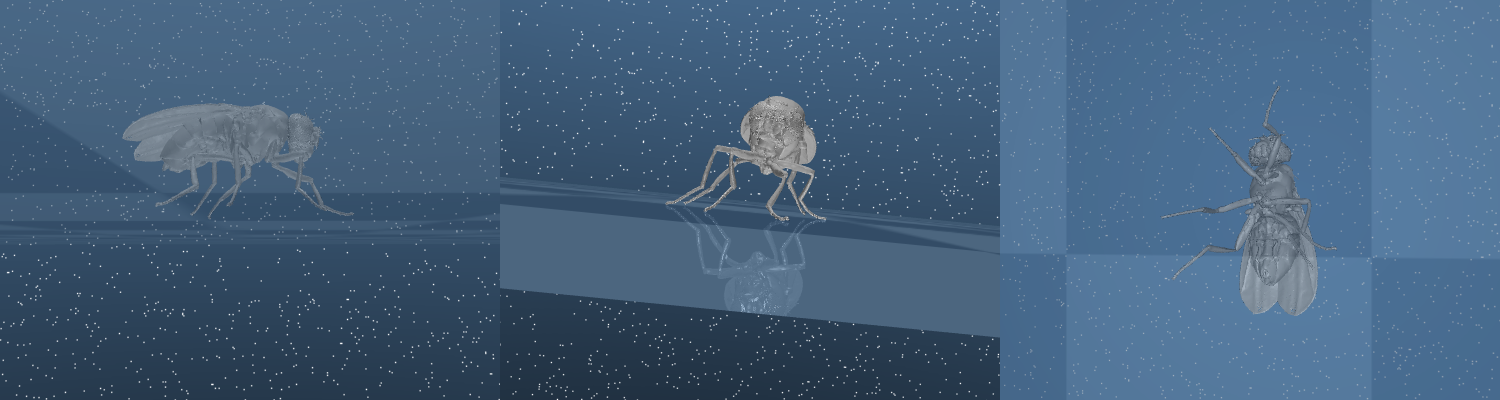

In [1202]:
all_viewpoints = []
h, w = 400, 500
for viewpoint in ['camera_front', 'camera_left', 'camera_bottom']:
    all_viewpoints.append(nmf.physics.render(camera_id=f"Animat/{viewpoint}", width=w, height=h))


im = PIL.Image.fromarray(np.hstack(all_viewpoints))
#show image
display(im)

In [1203]:
video_path = Path('SingleStepToWalking/video_noADH_modifs_MCoxa_45_MHscale1_5_Fscale0_75_left_view.mp4')
nmf.save_video(video_path)

from ipywidgets import Video
Video.from_file(video_path)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x12\\\x05mdat\x00\…